### Overall Flow

1. Problem Definition
2. Data Crunching
3. Data Processing
4. EDA
5. Model Building (Model refers to any solution: ML, DNN, Heuristic)
6. Model Evaluation
7. Model Deployment
8. Model Monitoring
9. Improvement

### Problem Definition

- People who took Personal Loan
- Digital or Phone Campaigning (Cost of Campaigninig)
- Digital: Low Cost
- Phone: Personal Calling

- KPIs
    - Interested
    - Loan repayment (0.9)
    - Loan Size (10000)
    - Interest rate

    
- The Problem is solved for a longer horizon
- Ultimately business strive for Profit


- Different Business Stakeholders
- need to break problem into phases


- Business understanding is important
    

### Data Points

- Amount
- Repayment behaviour
- Internet Banking Account - Did they visit Personal Loan section
- Whether they applied in the past
- etc
- Last activity


- Understanding of Databases;
- SQL (Pyspark, HIVE, Redshift, MySQL, Postgresql, CSV
- Masked Data, Sensitive Data
- Remove PII


- There are different types of customers
    - Defaulted on credit card
    - Premium Customers
    - NO Call Customers
    - Exclude them from Data

### Import Libraries

In [1]:
SEED=4

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
%load_ext autoreload
%autoreload 2

In [5]:
import os
import sys

In [6]:
import pandas as pd
import numpy as np

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [8]:
pd.set_option('max_rows',200)
pd.set_option('max_columns',None)

### Import dataset

In [9]:
INPUT_FILE = "Bank_Personal_Loan_Modelling.csv"
INPUT_DIR = "./"

In [10]:
def read_input(input_dir, input_file):
    
    df = pd.read_csv(os.path.join(input_dir, input_file))
    
    return df

In [11]:
df = read_input(INPUT_DIR, INPUT_FILE)

In [12]:
df.shape

(5000, 14)

### Sanity Check 1

In [13]:
def sanity_check_1(df):
    dtype = df.dtypes
    null = df.isnull().sum()
    unique = df.nunique()

    result_df = pd.concat([dtype, null, unique], axis=1)
    result_df.columns = ['dtype', 'null', 'unique']
    result_df['null_%'] = result_df['null'].values / len(df)
    
    
    return result_df

In [14]:
sanity_check_1(df)

,dtype,null,unique,null_%
ID,int64,0,5000,0.0
Age,int64,0,45,0.0
Experience,int64,0,47,0.0
Income,int64,0,162,0.0
ZIP Code,int64,0,467,0.0
Family,int64,0,4,0.0
CCAvg,float64,0,108,0.0
Education,int64,0,3,0.0
Mortgage,int64,0,347,0.0
Personal Loan,int64,0,2,0.0


- Check all columns have expected data type
- Integer are not read as float
- Dates
- Integer column not read as str



- It saves space
- specifying datatype enables reading data faster

### Univariate Distribution

In [15]:
univariate_df = pd.concat([df.describe().T, df.skew()], axis=1)
univariate_df.rename(columns={0:"skew"}, inplace=True)

In [16]:
univariate_df

,count,mean,std,min,25%,50%,75%,max,skew
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0,0.000000
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0,-0.029341
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0,-0.026325
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0,0.841339
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0,-12.500221
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0,0.155221
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0,1.598443
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0,0.227093
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0,2.104002
Personal Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0,2.743607


- ID no skew
- In binary variable - Skew would tell us the imbalance
- Skew would also tell about outlier

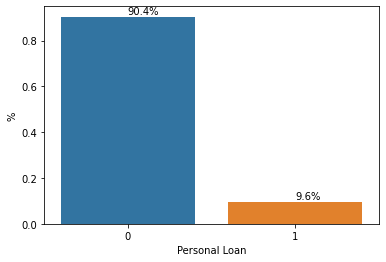

In [17]:
driver = 'Personal Loan'
_a = df[driver].value_counts(normalize=True).reset_index()
_a.columns = [driver, '%']
ax = sns.barplot(x=driver, y='%',data=_a)
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height())
    x = p.get_x() + p.get_width()/2
    y = p.get_height()+0.01
    ax.annotate(percentage, (x, y))
plt.show()

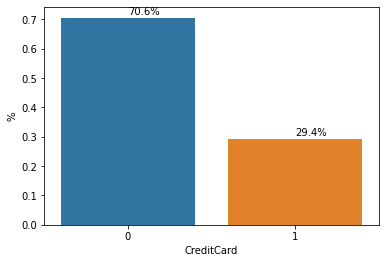

In [18]:
driver = 'CreditCard'
_a = df[driver].value_counts(normalize=True).reset_index()
_a.columns = [driver, '%']
ax = sns.barplot(x=driver, y='%',data=_a)
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height())
    x = p.get_x() + p.get_width()/2
    y = p.get_height()+0.01
    ax.annotate(percentage, (x, y))
plt.show()

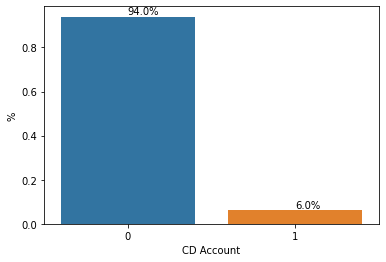

In [19]:
driver = 'CD Account'
_a = df[driver].value_counts(normalize=True).reset_index()
_a.columns = [driver, '%']
ax = sns.barplot(x=driver, y='%',data=_a)
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height())
    x = p.get_x() + p.get_width()/2
    y = p.get_height()+0.01
    ax.annotate(percentage, (x, y))
plt.show()

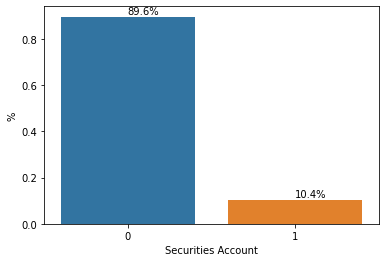

In [20]:
driver = 'Securities Account'
_a = df[driver].value_counts(normalize=True).reset_index()
_a.columns = [driver, '%']
ax = sns.barplot(x=driver, y='%',data=_a)
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height())
    x = p.get_x() + p.get_width()/2
    y = p.get_height()+0.01
    ax.annotate(percentage, (x, y))
plt.show()

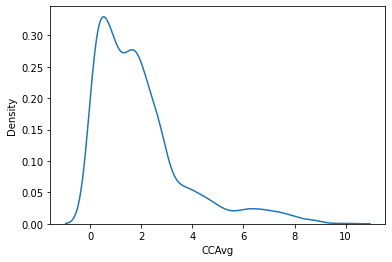

In [23]:
sns.distplot(df['CCAvg'], hist=False)
plt.show()

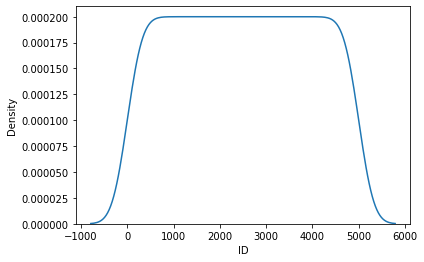

In [21]:
sns.distplot(df['ID'], hist=False)
plt.show()

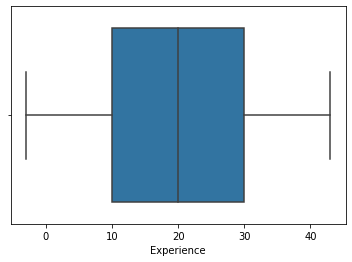

In [24]:
sns.boxplot(df['Experience'])
plt.show()

- Assuming typo
- Depending on your assumption, you may try other impuation methods
- Missing value
- Use correlation with age to impute this

In [27]:
df['Experience'] = df['Experience'].abs()

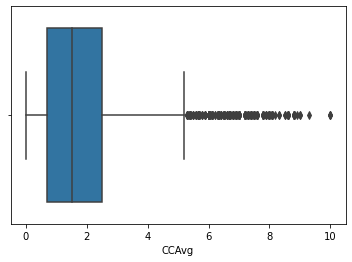

In [28]:
sns.boxplot(df['CCAvg'])
plt.show()

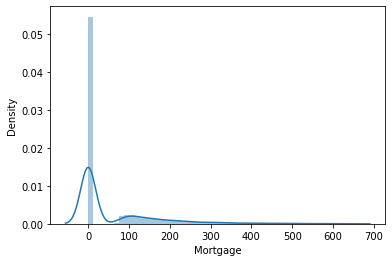

In [29]:
sns.distplot(df['Mortgage'])
plt.show()

In [ ]:
sns.boxplot(df['Mortgage'])
plt.show()

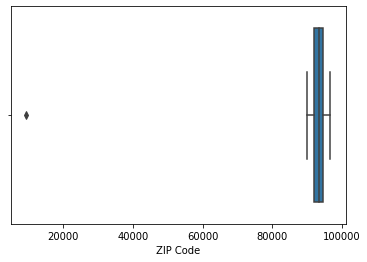

In [30]:
sns.boxplot(df['ZIP Code'])
plt.show()

### Bivariate

In [31]:
DEP_DRIVER = 'Personal Loan'

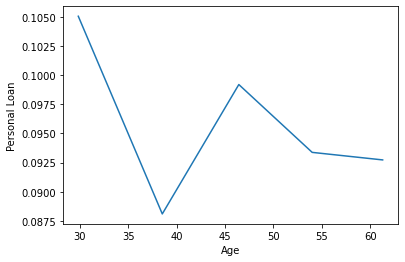

In [36]:
BUCKETS = 5
driver = 'Age'

df['b'] = pd.qcut(df[driver], q=BUCKETS)

grouped = df.groupby(by=['b'])[DEP_DRIVER, driver].agg('mean')

sns.lineplot(x=driver,
            y=DEP_DRIVER,
            data=grouped)
plt.show()                                           

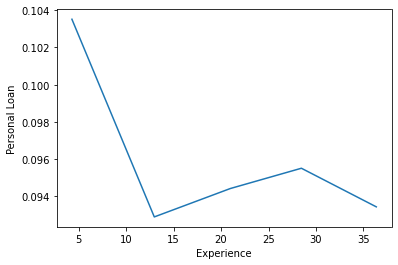

In [37]:
BUCKETS = 5
driver = 'Experience'
df['b'] = pd.qcut(df[driver], q=BUCKETS)
grouped = df.groupby(by=['b'])[DEP_DRIVER, driver].agg('mean')
sns.lineplot(x=driver,
            y=DEP_DRIVER,
            data=grouped)
plt.show()                                       

In [39]:
df['Mortgage'].nunique()

347

In [38]:
BUCKETS = 2
driver = 'Mortgage'

df['b'] = pd.qcut(df[driver], q=BUCKETS)

grouped = df.groupby(by=['b'])[DEP_DRIVER, driver].agg('mean')
sns.lineplot(x=driver,
            y=DEP_DRIVER,
            data=grouped)
plt.show()                                 

ValueError: Bin edges must be unique: array([  0.,   0., 635.]).
You can drop duplicate edges by setting the 'duplicates' kwarg

In [42]:
grouped

,Personal Loan,CCAvg
b,,
"(-0.001, 0.5]",0.026952,0.264405
"(0.5, 1.2]",0.033401,0.865901
"(1.2, 1.9]",0.030151,1.594754
"(1.9, 2.8]",0.047716,2.360721
"(2.8, 10.0]",0.356695,4.851036


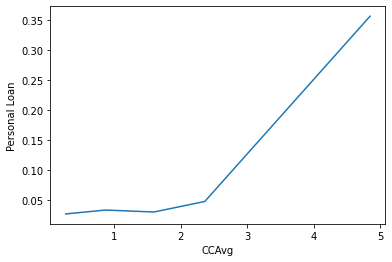

In [40]:
BUCKETS = 5
driver = 'CCAvg'

df['b'] = pd.qcut(df[driver], q=BUCKETS)

grouped = df.groupby(by=['b'])[DEP_DRIVER, driver].agg('mean')
sns.lineplot(x=driver,
            y=DEP_DRIVER,
            data=grouped)
plt.show()                               

In [41]:
for driver in ['Age', 'Experience','CCAvg','Mortgage']:
    
    mean_1 = df[df[DEP_DRIVER]==1][driver].mean()
    mean_0 = df[df[DEP_DRIVER]==0][driver].mean()
    
    signal = abs(mean_1-mean_0)
    
    noise = df[driver].std()
    
    snr = signal/noise
    
    print(driver, round(snr,3))

Age 0.026
Experience 0.028
CCAvg 1.245
Mortgage 0.482


In [ ]:
df.columns

In [45]:
driver='Education'
data_crosstab = pd.crosstab(df[driver],  
                            df[DEP_DRIVER], 
                                margins = False,
                           normalize='index')
data_crosstab

Personal Loan,0,1
Education,,
1,0.955630,0.044370
2,0.870278,0.129722
3,0.863424,0.136576


In [46]:
driver='Family'
data_crosstab = pd.crosstab(df[driver],  
                            df[DEP_DRIVER], 
                                margins = False,
                           normalize='index')
data_crosstab

Personal Loan,0,1
Family,,
1,0.927310,0.072690
2,0.918210,0.081790
3,0.868317,0.131683
4,0.890344,0.109656


In [47]:
driver='Mortgage_flag'
data_crosstab = pd.crosstab(df[driver],  
                            df[DEP_DRIVER], 
                                margins = False,
                           normalize='index')
data_crosstab

KeyError: 'Mortgage_flag'

In [48]:
driver='CreditCard'
data_crosstab = pd.crosstab(df[driver],  
                                df[DEP_DRIVER], 
                                    margins = False, normalize='index')
data_crosstab

Personal Loan,0,1
CreditCard,,
0,0.904533,0.095467
1,0.902721,0.097279


In [50]:
df.corr()['Personal Loan']

ID                   -0.024801
Age                  -0.007726
Experience           -0.008304
Income                0.502462
ZIP Code              0.000107
Family                0.061367
CCAvg                 0.366889
Education             0.136722
Mortgage              0.142095
Personal Loan         1.000000
Securities Account    0.021954
CD Account            0.316355
Online                0.006278
CreditCard            0.002802
Name: Personal Loan, dtype: float64

In [56]:
driver='Online'
data_crosstab = pd.crosstab(df[driver],  
                            df[DEP_DRIVER], 
                            margins = False,
                            normalize='index')
data_crosstab

Personal Loan,0,1
Online,,
0,0.90625,0.09375
1,0.90248,0.09752


https://towardsdatascience.com/chi-squared-test-for-feature-selection-with-implementation-in-python-65b4ae7696db

In [54]:
from scipy.stats import chi2_contingency

In [55]:
for driver in ['Education', 'Family', 'Securities Account',
       'CD Account', 'Online', 'CreditCard']:
    
    data_crosstab = pd.crosstab(df[driver],  
                                df[DEP_DRIVER], 
                                    margins = False)
    
    stat, p, dof, expected = chi2_contingency(data_crosstab)
    
    print(driver, stat, p, dof, expected, end="\n\n\n")

Education 111.2398718738913 6.991473868665428e-25 2 [[1894.784  201.216]
 [1268.312  134.688]
 [1356.904  144.096]]


Family 29.676116414854746 1.6144121228248757e-06 3 [[1330.688  141.312]
 [1171.584  124.416]
 [ 913.04    96.96 ]
 [1104.688  117.312]]


Securities Account 2.172310545186504 0.14051497326319357 1 [[4048.112  429.888]
 [ 471.888   50.112]]


CD Account 495.90424218782334 7.398297503329848e-110 1 [[4246.992  451.008]
 [ 273.008   28.992]]


Online 0.15600672120524922 0.6928599643141484 1 [[1822.464  193.536]
 [2697.536  286.464]]


CreditCard 0.021144453920855056 0.8843861223314504 1 [[3191.12  338.88]
 [1328.88  141.12]]




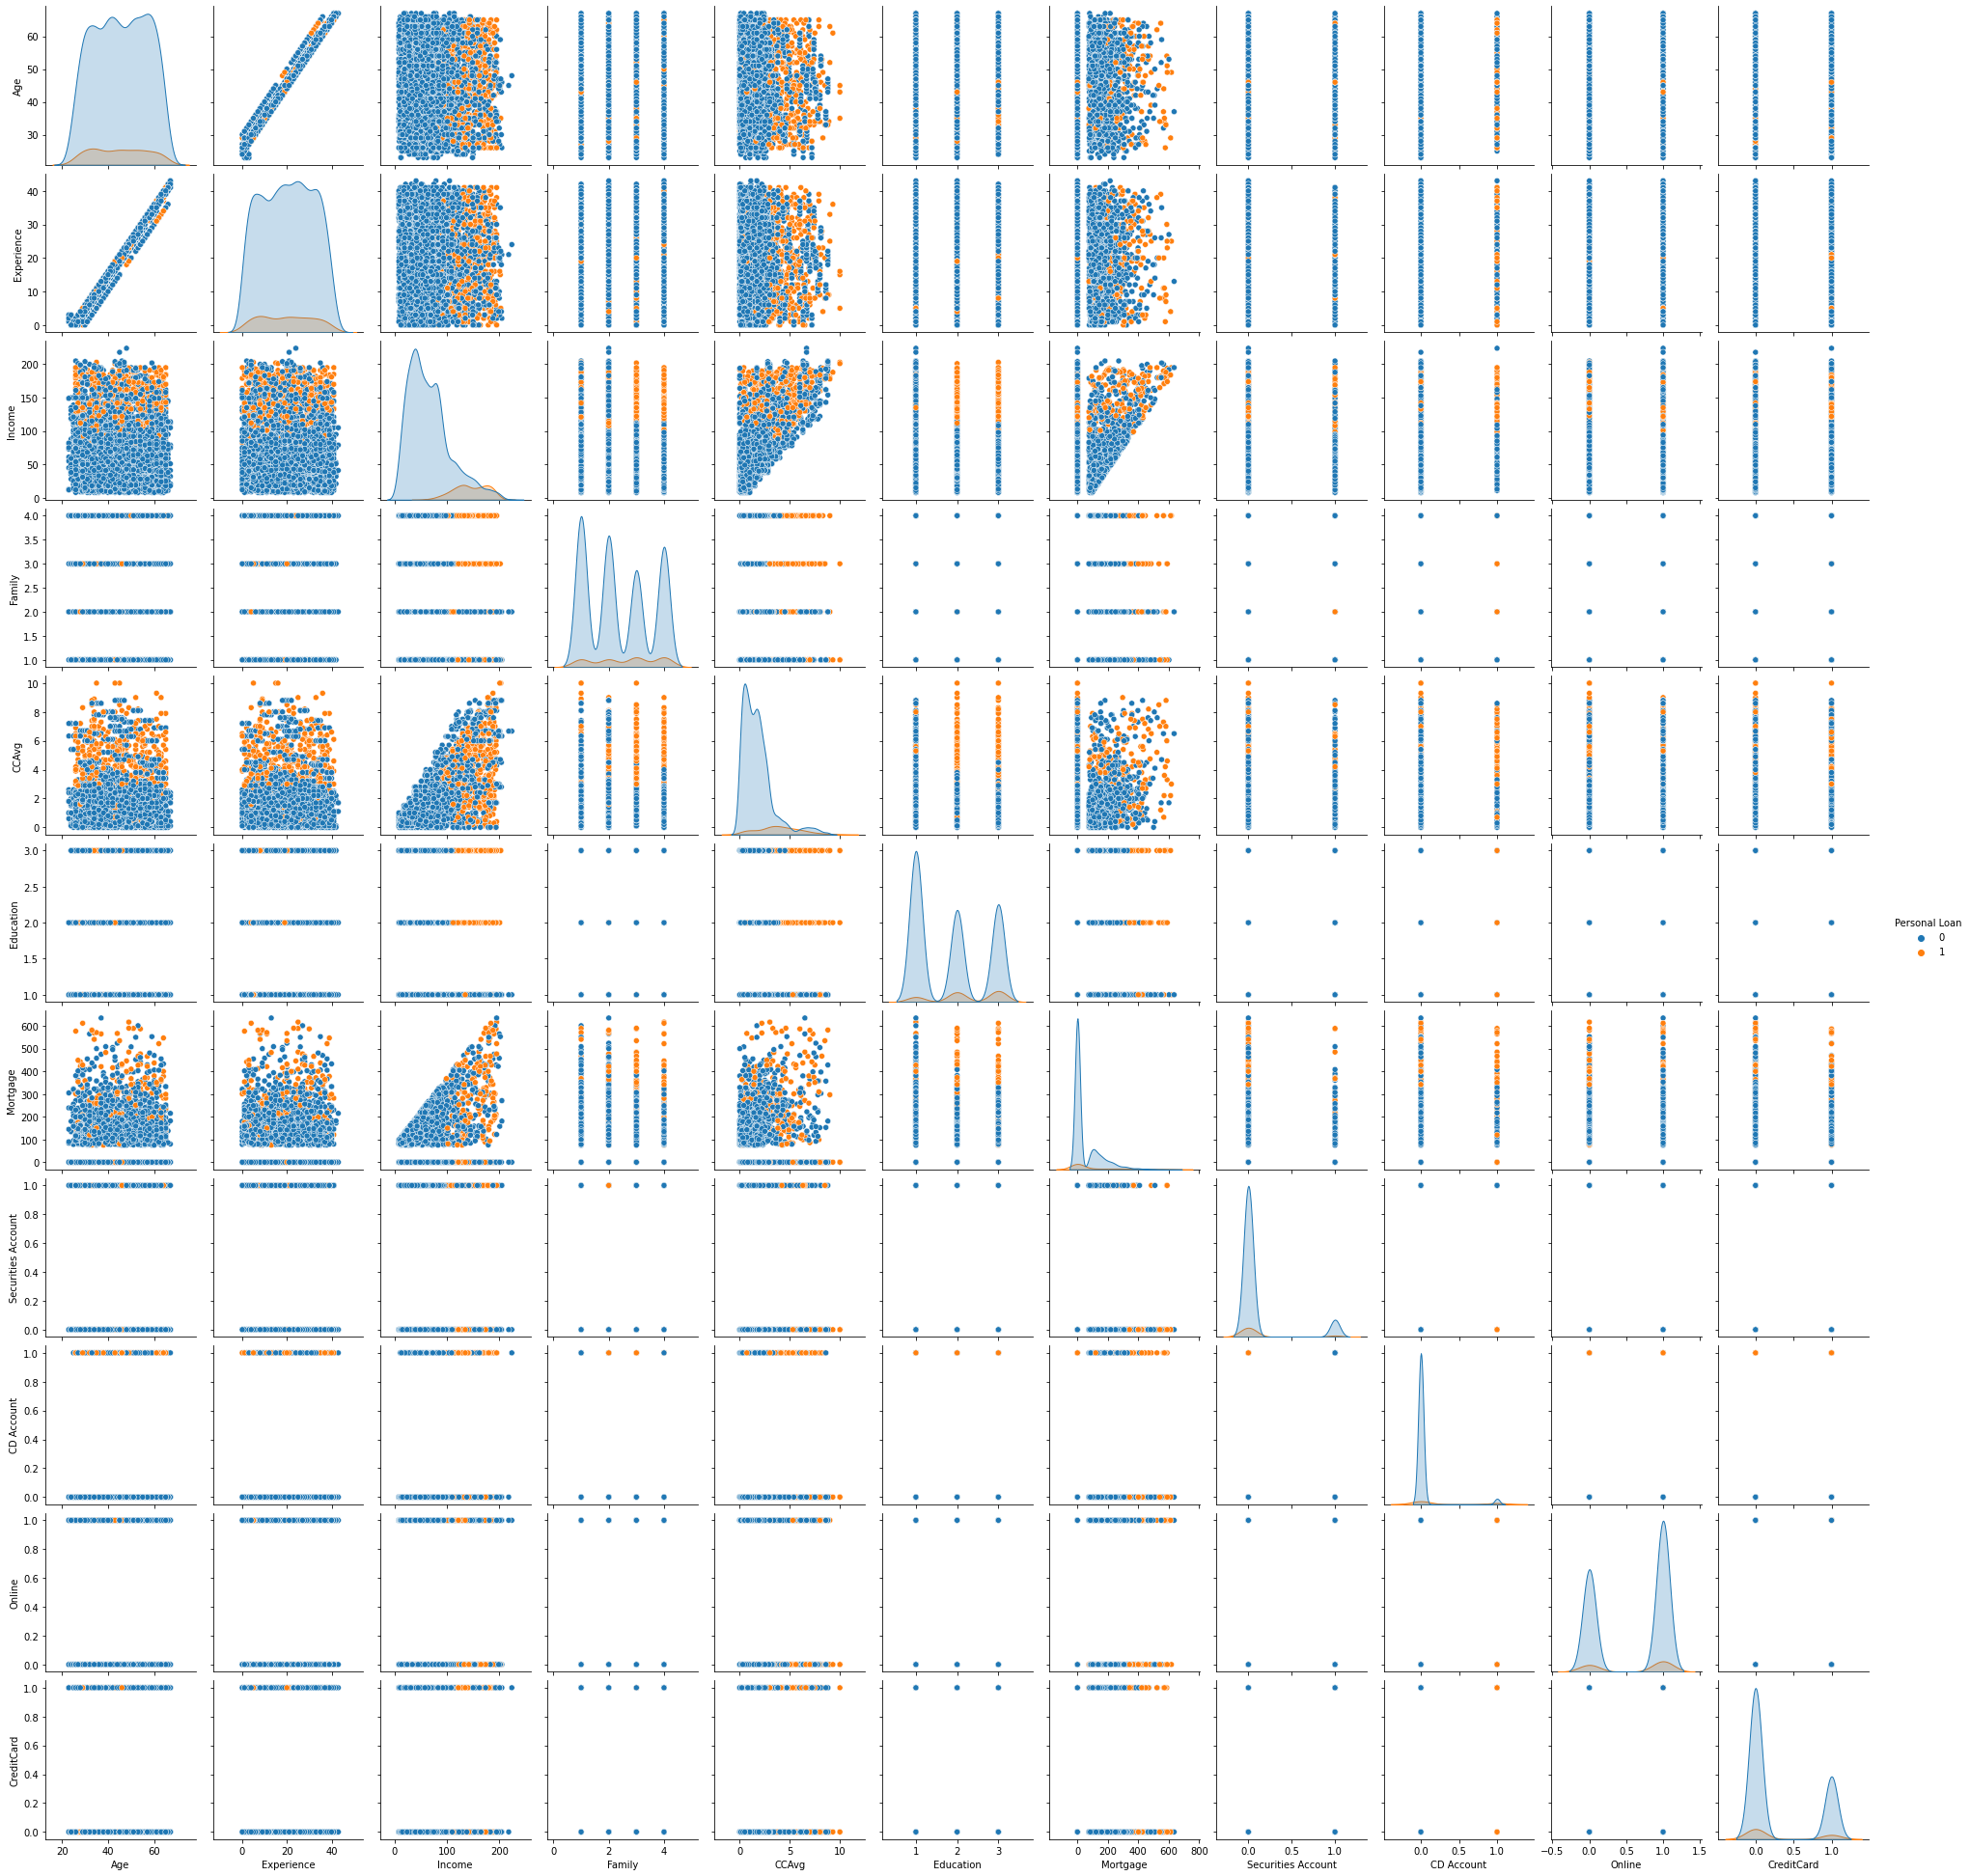

In [60]:
sns.pairplot(df[features+[DEP_DRIVER]], diag_kind='kde', hue='Personal Loan')

### Model Building

In [57]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix, recall_score, precision_score, f1_score, roc_auc_score

In [58]:
features = ['Age', 'Experience', 'Income', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Securities Account',
       'CD Account', 'Online', 'CreditCard']

In [61]:
other_features = ['r_income_family', 'r_ccavg_income', 'i_mortgage_experience', 'education_flag',
                  'i_online_creditCcrd','i_creditcard_securities','num_products','any_product',
                 'income_log','Mortgage_flag']

In [62]:
df['r_income_family'] = df['Income'].values / df['Family'].values
df['r_ccavg_income'] = df['CCAvg'].values / df['Income'].values
df['i_mortgage_experience'] = df['Mortgage'].values * df['Experience'].values
df['i_online_creditCcrd'] = df['Online'].values * df['CreditCard'].values
df['i_creditcard_securities'] = df['CreditCard'].values * df['Securities Account'].values

df['education_flag'] = (df['Education']<=1).astype(int)

df['num_products'] = df[['Securities Account','CD Account','CreditCard']].sum(axis=1)
df['any_product'] = df[['Securities Account','CD Account','CreditCard']].max(axis=1)

df['income_log'] = np.log(df['Income'])
df['Mortgage_flag'] = (df['Mortgage'].values > 0).astype(int)

In [63]:
all_features = features + other_features

In [69]:

X_train, X_test, Y_train, Y_test = train_test_split(df[all_features],
                                                    df[DEP_DRIVER],
                                                    test_size=0.3,
                                                    random_state=SEED
                                                   )


In [70]:
# importing logistic regression from scikit learn

model = LogisticRegression(random_state=SEED)  #assigning a variable for the algorithm
model.fit(X_train, Y_train)

LogisticRegression(random_state=4)

In [71]:
def all_evaluation_metrics(y_true, y_pred):
    
    recall = recall_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    roc_auc = roc_auc_score(y_true, y_pred)
    
    return recall, precision, f1, roc_auc

In [72]:
train_performance = all_evaluation_metrics(Y_train, model.predict(X_train))
test_performance = all_evaluation_metrics(Y_test, model.predict(X_test))

In [68]:
performance_df = pd.DataFrame([train_performance,test_performance],
                             columns=['recall','precision','f1','roc_auc'],
                             index=['train','test'])
performance_df

,recall,precision,f1,roc_auc
train,0.599398,0.792829,0.682676,0.791492
test,0.527027,0.886364,0.661017,0.759815


In [73]:
performance_df = pd.DataFrame([train_performance,test_performance],
                             columns=['recall','precision','f1','roc_auc'],
                             index=['train','test'])
performance_df

,recall,precision,f1,roc_auc
train,0.581325,0.824786,0.681979,0.784192
test,0.520270,0.855556,0.647059,0.755327


https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

Please refer above link for the details of parameters

In [74]:

for fit_intercept_value in [True, False]:
    
    model = LogisticRegression(fit_intercept = fit_intercept_value)
    model.fit(X_train, Y_train) 
    train_performance = all_evaluation_metrics(Y_train, model.predict(X_train))
    test_performance = all_evaluation_metrics(Y_test, model.predict(X_test))
    
    performance_df = pd.DataFrame([train_performance,test_performance],
                             columns=['recall','precision','f1','roc_auc'],
                             index=['train','test'])
    print(fit_intercept_value)
    print(performance_df)
    print("\n\n")

True
         recall  precision        f1   roc_auc
train  0.581325   0.824786  0.681979  0.784192
test   0.520270   0.855556  0.647059  0.755327



False
         recall  precision        f1   roc_auc
train  0.611446   0.825203  0.702422  0.798936
test   0.581081   0.868687  0.696356  0.785733





In [ ]:
loss = loss_from_obs_having_class_0 (90) + loss_from_obs_having_class_1 (10)
loss_balanced = loss_from_obs_having_class_0 (90) + 9*10*loss_from_obs_having_class_1

In [75]:
model = LogisticRegression(class_weight='balanced')
model.fit(X_train, Y_train) 
train_performance = all_evaluation_metrics(Y_train, model.predict(X_train))
test_performance = all_evaluation_metrics(Y_test, model.predict(X_test))

performance_df = pd.DataFrame([train_performance,test_performance],
                         columns=['recall','precision','f1','roc_auc'],
                         index=['train','test'])
print(fit_intercept_value)
print(performance_df)
print("\n\n")

False
         recall  precision        f1   roc_auc
train  0.891566   0.469097  0.614746  0.892911
test   0.885135   0.453287  0.599542  0.884136





### 6] Give Business understanding of your model? (5 marks)

**Confusion matrix means**

*True Positive (observed=1,predicted=1):*

Predicted Personal loan will be taken and the customer took it

*False Positive (observed=0,predicted=1):*

Predicted Personal loan will be taken and the customer did not take it

*True Negative (observed=0,predicted=0):*

Predicted Personal loan will not be taken and the customer did not take it

*False Negative (observed=1,predicted=0):*

Predicted Personal loan will not be taken and the customer took it

Here more focus towards should be towards recall because our target variable is 'Personal Loan' , i.e whether the customer is accepting the personal loan or not. And the bank wants more people to accept personal loan i.e. less number of False Negative, so that bank doesn't lose real customers who want to take loan. Hence the focus should be on increasing Recall.

After achieving the desired accuracy we can deploy the model for practical use. As in the bank now can predict who will say yes for the personnel loan. They can use the model for upcoming customers.

In [ ]:
Revenue per customer: 100
    
1$
100 customers - 1 customer convert



Revenue per customer: 100
    
50$
100 customers - 50 customer convert (precision)



- Cost of Reach Out
- Customer Satisfaction

100 customers | 90%

- 90%
- 95%
- 20%
- 

- Agent Wise Tracking
- 

Leads - Explanation

- Model Explanatory (Explaining to the agent why model give a higher score to the customer)

In [76]:
#Build the logistic regression model
import statsmodels.api as sm

logit = sm.Logit(Y_train, sm.add_constant(X_train))
lg = logit.fit()

         Current function value: 0.080841
         Iterations: 35


/Users/vinodgattani/anaconda3/envs/python38/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [77]:
lgcoef = pd.DataFrame(lg.params, columns=['coef'])
lgcoef.loc[:, "Odds_ratio"] = np.exp(lgcoef.coef)
lgcoef['probability'] = lgcoef['Odds_ratio']/(1+lgcoef['Odds_ratio'])
lgcoef['pval']=lg.pvalues
pd.options.display.float_format = '{:.2f}'.format

In [ ]:
np.exp(1.75)

In [78]:
lgcoef

,coef,Odds_ratio,probability,pval
const,-136.13,0.00,0.00,0.00
Age,-0.03,0.97,0.49,0.71
Experience,0.03,1.03,0.51,0.76
Income,-0.13,0.88,0.47,0.00
Family,0.41,1.50,0.60,0.06
CCAvg,-1.78,0.17,0.14,0.00
Education,-0.28,0.76,0.43,0.37
Mortgage,-0.00,1.00,0.50,0.14
Securities Account,-8.53,0.00,0.00,1.00
CD Account,11.36,86171.79,1.00,1.00


In [79]:
pvalues = lg.pvalues.to_dict()
max_p_value = 0
max_p_value_driver = None

for key in pvalues:
    _pvalue = pvalues[key]
    
    if _pvalue > max_p_value and key != 'const':
        max_p_value = _pvalue
        max_p_value_driver = key
max_p_value, max_p_value_driver

(0.9999997754646318, 'num_products')

In [84]:
to_drop_columns = ['num_products','i_creditcard_securities','Mortgage_flag']

In [95]:
to_drop_columns = ['num_products','i_creditcard_securities','Mortgage_flag','Experience','Age',
                  'Education','Online','any_product','CreditCard','Mortgage','i_mortgage_experience',
                  'r_income_family','Income','CCAvg']

In [ ]:
to_drop_columns = ['num_products','i_creditcard_securities','Mortgage_flag','Experience','Age',
                  'Education','Online','any_product','CreditCard','Mortgage','i_mortgage_experience',
                  'r_income_family','Income','CCAvg']

In [88]:
logit = sm.Logit(Y_train, sm.add_constant(X_train.drop(columns=to_drop_columns)))
lg = logit.fit()

pvalues = lg.pvalues.to_dict()
max_p_value = 0
max_p_value_driver = None

for key in pvalues:
    _pvalue = pvalues[key]
    
    if _pvalue > max_p_value and key != 'const':
        max_p_value = _pvalue
        max_p_value_driver = key
max_p_value, max_p_value_driver

Optimization terminated successfully.
         Current function value: 0.082574
         Iterations 13


(0.02723896498242525, 'Securities Account')

In [97]:
logit = sm.Logit(Y_train, sm.add_constant(X_train.drop(columns=to_drop_columns)))
lg = logit.fit()

Optimization terminated successfully.
         Current function value: 0.097243
         Iterations 11


In [98]:
lgcoef = pd.DataFrame(lg.params, columns=['coef'])
lgcoef.loc[:, "Odds_ratio"] = np.exp(lgcoef.coef)
lgcoef['probability'] = lgcoef['Odds_ratio']/(1+lgcoef['Odds_ratio'])
lgcoef['pval']=lg.pvalues
pd.options.display.float_format = '{:.2f}'.format

In [99]:
lgcoef.sort_values(by='Odds_ratio', ascending=False)

,coef,Odds_ratio,probability,pval
r_ccavg_income,32.18,94160130604240.17,1.00,0.00
income_log,8.27,3910.10,1.00,0.00
CD Account,6.15,469.20,1.00,0.00
Family,0.64,1.90,0.66,0.00
Securities Account,-1.24,0.29,0.23,0.01
education_flag,-4.19,0.02,0.01,0.00
i_online_creditCcrd,-4.94,0.01,0.01,0.00
const,-41.73,0.00,0.00,0.00


In [91]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif

In [96]:
feature_columns = X_train.drop(columns=to_drop_columns).columns.tolist()
X_values = X_train[feature_columns].values
X_values = np.hstack((np.ones((len(X_values), 1)), X_values))
for index, feature in enumerate(['constant']+feature_columns):
    
    vif_value = vif(X_values, index)
    print(f"{feature}: {vif_value}", sep="\t")

constant: 51.57942919225815
Family: 1.0293016109864481
Securities Account: 1.1317399222581874
CD Account: 1.369454092541281
r_ccavg_income: 1.0368890800683093
education_flag: 1.0579186730674288
i_online_creditCcrd: 1.2215768836913685
income_log: 1.1097148216226562


In [100]:
X_train.drop(columns=to_drop_columns, inplace=True)
X_test.drop(columns=to_drop_columns, inplace=True)

In [ ]:
train	0.599398	0.792829	0.682676	0.791492
test	0.527027	0.886364	0.661017	0.759815

In [101]:
model = LogisticRegression()
model.fit(X_train, Y_train) 
train_performance = all_evaluation_metrics(Y_train, model.predict(X_train))
test_performance = all_evaluation_metrics(Y_test, model.predict(X_test))

performance_df = pd.DataFrame([train_performance,test_performance],
                         columns=['recall','precision','f1','roc_auc'],
                         index=['train','test'])
print(performance_df)
print("\n\n")

       recall  precision   f1  roc_auc
train    0.70       0.92 0.80     0.85
test     0.66       0.95 0.78     0.83



